In [64]:
#Importing Libraries

# Start Python Imports
import math, time, random, datetime



In [65]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from imblearn.over_sampling import SMOTE



In [66]:
# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import confusion_matrix


In [67]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


In [68]:

#Loading data set
claims = pd.read_csv("E:\\data science assigment\\video study\\Claims.csv")
claims.head()
claims.shape


(11917, 21)

In [69]:
# Data cleasing and EDA
claims.loc[(claims.State == "UP"), "State"] = "Uttar Pradesh"  ## Replacing UP with Uttar Pradesh
claims.loc[(claims.Purpose == "claim"), "Purpose"] = "Claim"  ## Replacing claim with Claim
claims.loc[(claims.State == "Telengana"), "City"] = "Hyderabad 1"   ## Separating hyderbad among two states. like Andhra Pradesh = Hyderbad, Telengana = Hyderabad 1


In [70]:
claims.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11917 entries, 0 to 11916
Data columns (total 21 columns):
Unnamed: 0          11917 non-null int64
Region              11917 non-null object
State               11917 non-null object
Area                11917 non-null object
City                11917 non-null object
Consumer_profile    11917 non-null object
Product_category    11917 non-null object
Product_type        11917 non-null object
AC_1001_Issue       11917 non-null int64
AC_1002_Issue       11917 non-null int64
AC_1003_Issue       11917 non-null int64
TV_2001_Issue       11917 non-null int64
TV_2002_Issue       11917 non-null int64
TV_2003_Issue       11917 non-null int64
Claim_Value         11584 non-null float64
Service_Centre      11917 non-null int64
Product_Age         11917 non-null int64
Purchased_from      11917 non-null object
Call_details        11917 non-null float64
Purpose             11917 non-null object
Fraud               11917 non-null int64
dtypes: float64(2

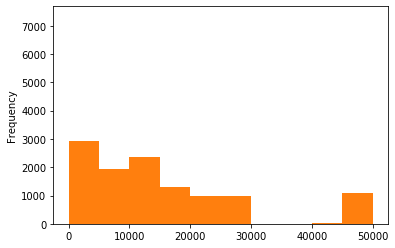

In [71]:
# Histograms of various continous variables
claims.Product_Age.plot.hist()
claims.Claim_Value.plot.hist()
claims.Call_details.plot.hist()


In [72]:
#checking mean median count of various variables in dataset
claims.describe()



,Unnamed: 0,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,11917.000000,11917.000000,11917.000000,11917.000000,11917.000000,11917.000000,11917.000000,11584.000000,11917.000000,11917.000000,11917.000000,11917.000000
mean,13292.336578,0.267181,0.300747,0.188302,0.349333,0.431317,0.292607,14249.154178,12.832340,164.800369,10.557456,0.082907
std,21550.381936,0.568215,0.586159,0.495993,0.582612,0.643677,0.545410,13391.341692,1.731058,234.649131,11.547465,0.275753
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000,0.000000
25%,2980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4891.000000,12.000000,10.000000,1.400000,0.000000
50%,5959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,13.000000,21.000000,2.600000,0.000000
75%,8938.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20000.000000,14.000000,281.000000,21.000000,0.000000
max,99311.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,50000.000000,16.000000,991.000000,30.000000,1.000000


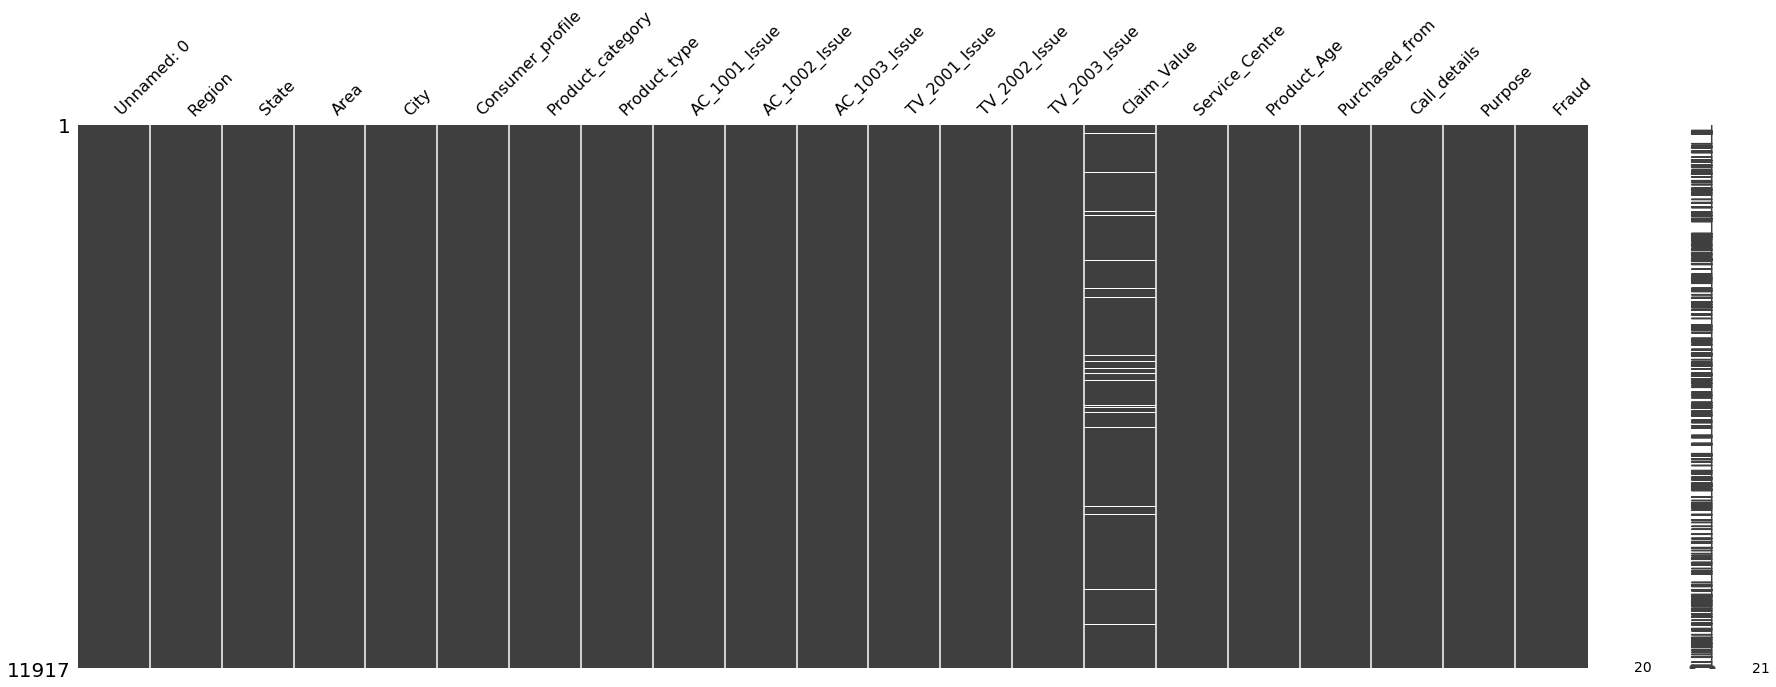

In [73]:
#plot for missing values
missingno.matrix(claims, figsize = (30,10))



In [74]:
# Alternatively, you can see the number of missing values like this
claims.isnull().sum()



Unnamed: 0            0
Region                0
State                 0
Area                  0
City                  0
Consumer_profile      0
Product_category      0
Product_type          0
AC_1001_Issue         0
AC_1002_Issue         0
AC_1003_Issue         0
TV_2001_Issue         0
TV_2002_Issue         0
TV_2003_Issue         0
Claim_Value         333
Service_Centre        0
Product_Age           0
Purchased_from        0
Call_details          0
Purpose               0
Fraud                 0
dtype: int64

In [75]:
# Different data types in the dataset
claims.dtypes



Unnamed: 0            int64
Region               object
State                object
Area                 object
City                 object
Consumer_profile     object
Product_category     object
Product_type         object
AC_1001_Issue         int64
AC_1002_Issue         int64
AC_1003_Issue         int64
TV_2001_Issue         int64
TV_2002_Issue         int64
TV_2003_Issue         int64
Claim_Value         float64
Service_Centre        int64
Product_Age           int64
Purchased_from       object
Call_details        float64
Purpose              object
Fraud                 int64
dtype: object

In [76]:
# 1st column : Region
# How many missing values does Region have?
claims.Region.isnull().sum() 

0

In [77]:
# unique value counts
claims.Region.value_counts()


South         2690
North East    1761
West          1608
South East    1607
East          1168
North         1104
South West    1065
North West     914
Name: Region, dtype: int64

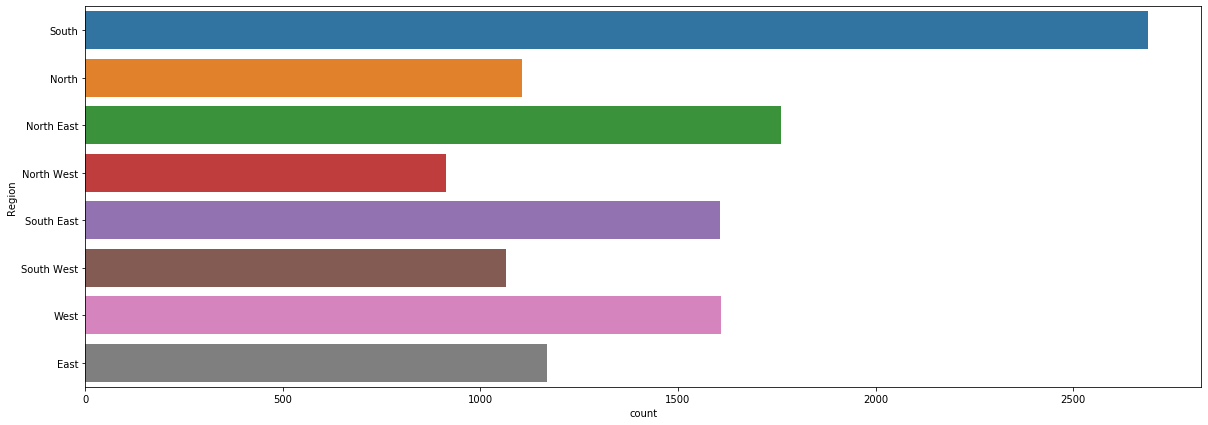

In [78]:
#regions distribution 
fig = plt.figure(figsize=(20,7))
sns.countplot(y='Region', data=claims);


In [81]:
# adding this to subset dataframes
claims_bin['Region'] = claims['Region']
claims_con['Region'] = claims['Region']


NameError: name 'claims_bin' is not defined

In [80]:
#14th column : Claim_Value
# How many missing values does Claim_Value have?
claims.Claim_Value.isnull().sum()


333

In [20]:
# checking mean and median of claim value
claims["Claim_Value"].mean() #14051.15 rs
claims["Claim_Value"].median() #10000 rs


10000.0

In [21]:
#imputed NA values or missing values with median of claim_value variable
claims["Claim_Value"].fillna(10000,inplace=True)


In [22]:
# How many different values of Claim_Value are there?
fig = plt.figure(figsize=(30,20))


<Figure size 2160x1440 with 0 Axes>

In [23]:
sns.countplot(y="Claim_Value", data=claims);


NameError: name 'sns' is not defined

In [24]:
# How many unique kinds of Claim_Value are there?
print("There are {} unique values in Claim_Value.".format(len(claims.Claim_Value.unique())))


There are 105 unique values in Claim_Value.


In [25]:
# Add Claim Value to sub dataframes
claims_bin['Claim_Value'] = pd.cut(claims['Claim_Value'], bins=5) # discretised into 5 categories
claims_con['Claim_Value'] = claims['Claim_Value'] 

NameError: name 'claims_bin' is not defined

In [26]:
# Function to create count and distribution visualisations
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Fraud"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Genuine"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Fraud"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Genuine"});


In [27]:
# What do our Claim Value bins look like?
claims_bin.Claim_Value.value_counts()


NameError: name 'claims_bin' is not defined

In [28]:
# Visualise the Claim Value bin counts as well as the Claim_Value distribution versus Fraud.
plot_count_dist(data=claims,
                bin_df=claims_bin,
                label_column='Fraud', 
                target_column='Claim_Value', 
                figsize=(20,10), 
                use_bin_df=True)

NameError: name 'claims_bin' is not defined

In [32]:
#15th column : Service_Centre
# How many missing values does Service_Centre have?
claims.Service_Centre.isnull().sum()


0

In [33]:
#unique value count 
claims.Service_Centre.value_counts()


15    2818
12    2447
13    2300
10    2003
14    1770
11     537
16      42
Name: Service_Centre, dtype: int64

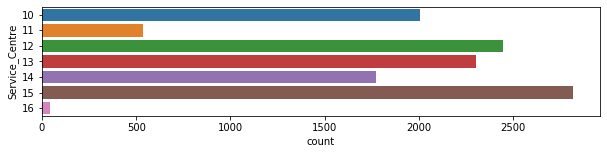

In [34]:
#Service_centre distribution 
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Service_Centre', data=claims);


In [35]:
# adding this to subset dataframes
claims_bin['Service_Centre'] = claims['Service_Centre']
claims_con['Service_Centre'] = claims['Service_Centre']


NameError: name 'claims_bin' is not defined

In [36]:
#16th column : Product_Age
# How many missing values does Product_Age have?
claims.Product_Age.isnull().sum()


0

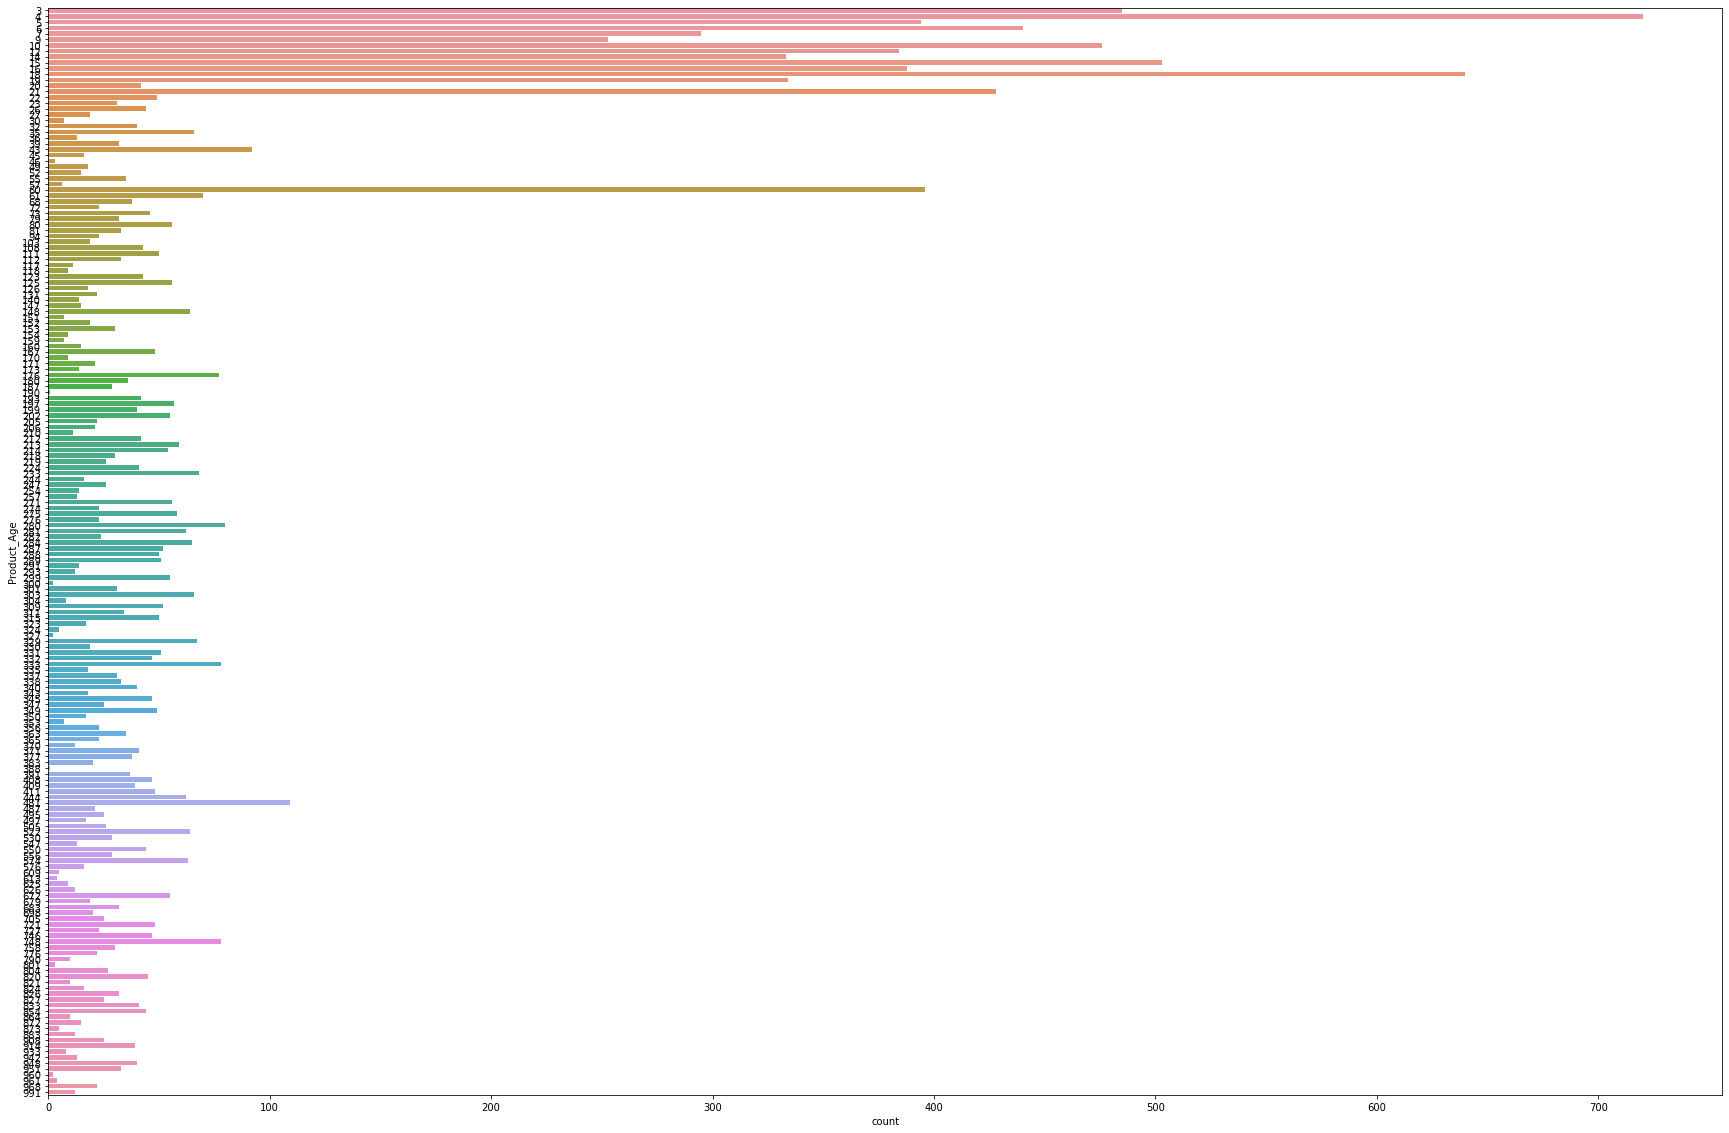

In [37]:
# How many different values of Product_Age are there?
fig = plt.figure(figsize=(30,20))
sns.countplot(y="Product_Age", data=claims);


In [38]:
# How many unique kinds of Product_Age are there?
print("There are {} unique values in Product_Age.".format(len(claims.Product_Age.unique())))


There are 188 unique values in Product_Age.


In [39]:
# Add Product_Age to sub dataframes
claims_bin['Product_Age'] = pd.cut(claims['Product_Age'], bins=5) # discretised
claims_con['Product_Age'] = claims['Product_Age'] 


NameError: name 'claims_bin' is not defined

In [40]:
# What do our Product_Age bins look like?
claims_bin.Product_Age.value_counts()


NameError: name 'claims_bin' is not defined

In [41]:
# Visualise the Product_Age bin counts as well as the Product_Age distribution versus Fraud.
plot_count_dist(data=claims,
                bin_df=claims_bin,
                label_column='Fraud', 
                target_column='Product_Age', 
                figsize=(20,10), 
                use_bin_df=True)

NameError: name 'claims_bin' is not defined

In [42]:
#17th column : Purchased_from
# How many missing values does Purchased_from have?
claims.Purchased_from.isnull().sum()


0

In [43]:
#unique value count
claims.Purchased_from.value_counts()


Dealer          4999
Manufacturer    4287
Internet        2631
Name: Purchased_from, dtype: int64

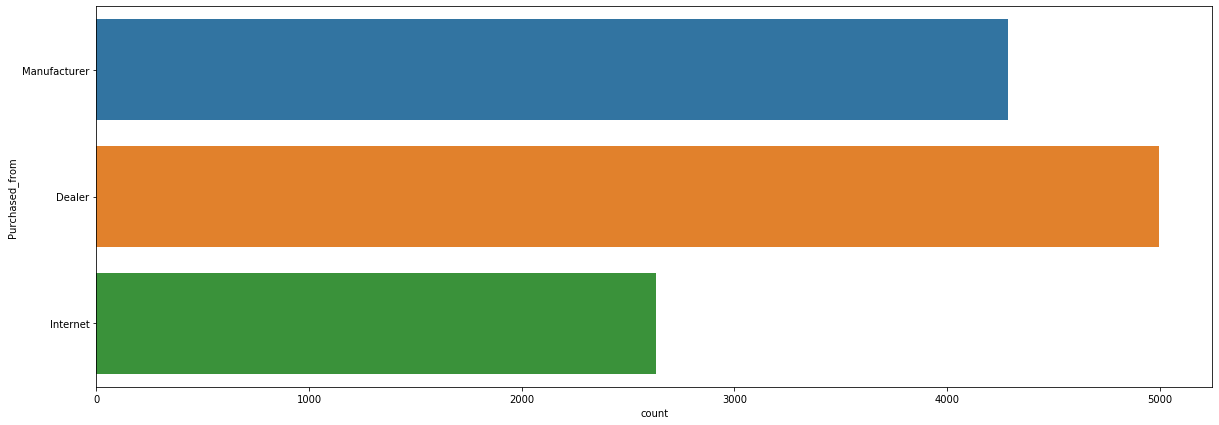

In [44]:
#Purchased_from distribution 
fig = plt.figure(figsize=(20,7))
sns.countplot(y='Purchased_from', data=claims);


In [45]:
# adding this to subset dataframes
claims_bin['Purchased_from'] = claims['Purchased_from']
claims_con['Purchased_from'] = claims['Purchased_from']


NameError: name 'claims_bin' is not defined

In [46]:
#18th column : Call_details
# How many missing values does Call_details have?
claims.Call_details.isnull().sum()


0

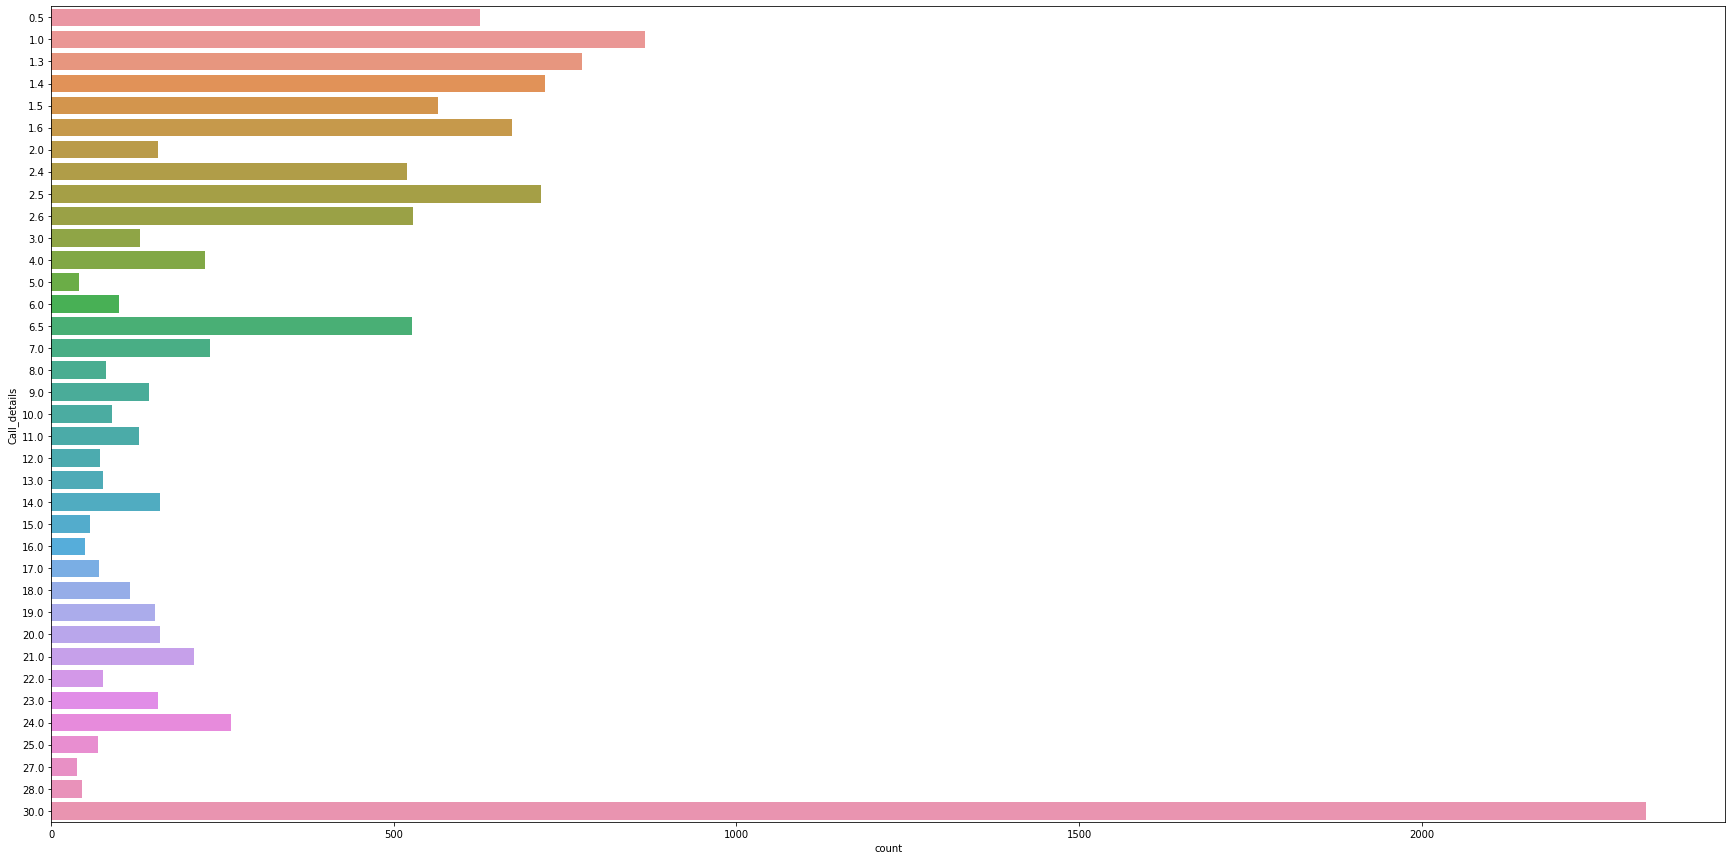

In [47]:
# How many different values of Call_details are there?
fig = plt.figure(figsize=(30,15))
sns.countplot(y="Call_details", data=claims);


In [48]:
# How many unique kinds of Call_details are there?
print("There are {} unique values in Call_details.".format(len(claims.Call_details.unique())))


There are 37 unique values in Call_details.


In [49]:
# Add Call_details to sub dataframes
claims_bin['Call_details'] = pd.cut(claims['Call_details'], bins=5) # discretised
claims_con['Call_details'] = claims['Call_details']


NameError: name 'claims_bin' is not defined

In [50]:
# What do our Call_details bins look like?
claims_bin.Call_details.value_counts()


NameError: name 'claims_bin' is not defined

In [51]:
# Visualise the Call_details bin counts as well as the Call_details distribution versus Fraud.
plot_count_dist(data=claims,
                bin_df=claims_bin,
                label_column='Fraud', 
                target_column='Call_details', 
                figsize=(20,10), 
                use_bin_df=True)


NameError: name 'claims_bin' is not defined

In [52]:
#19th column : Purpose
# How many missing values does Purpose have?
claims.Purpose.isnull().sum()


0

In [53]:
#Unique value count
claims.Purpose.value_counts()


Claim        5583
Complaint    5067
Other        1267
Name: Purpose, dtype: int64

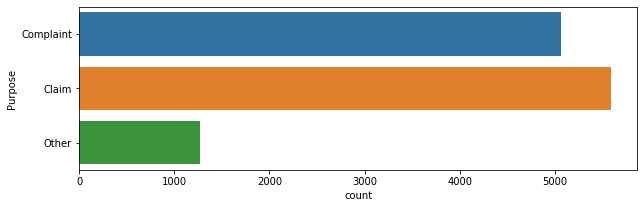

In [54]:
#purpose distribution 
fig = plt.figure(figsize=(10,3))
sns.countplot(y='Purpose', data=claims);


In [55]:
# adding this to subset dataframes
claims_bin['Purpose'] = claims['Purpose']
claims_con['Purpose'] = claims['Purpose']


NameError: name 'claims_bin' is not defined

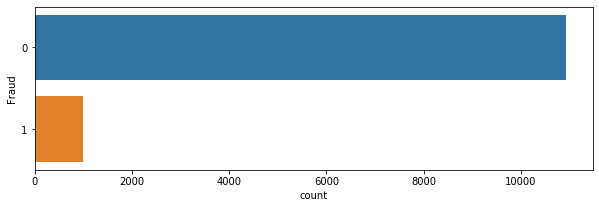

In [56]:
#20th column : Fraud
# How many people fraudulent?
fig = plt.figure(figsize=(10,3))
sns.countplot(y='Fraud', data=claims);


In [57]:
# adding this to subset dataframes
claims_bin['Fraud'] = claims['Fraud']
claims_con['Fraud'] = claims['Fraud']



NameError: name 'claims_bin' is not defined

In [58]:
#checking claim bin
claims_bin.head()


NameError: name 'claims_bin' is not defined

In [59]:
# One-hot encode binned variables
one_hot_cols = claims_bin.columns.tolist()
one_hot_cols.remove('Fraud')
claims_bin_enc = pd.get_dummies(claims_bin, columns=one_hot_cols)
claims_bin_enc.head()

NameError: name 'claims_bin' is not defined

In [60]:
#checking claim bin
claims_con.head() 

NameError: name 'claims_con' is not defined

In [62]:
# One hot encode the categorical columns individually
claims_Region_one_hot = pd.get_dummies(claims_con['Region'],prefix='region')
claims_State_one_hot = pd.get_dummies(claims_con['State'],prefix='state')
claims_Area_one_hot = pd.get_dummies(claims_con['Area'],prefix='area')
claims_City_one_hot = pd.get_dummies(claims_con['City'],prefix='city')
claims_Conpro_one_hot = pd.get_dummies(claims_con['Consumer_profile'],prefix='consumer_profile')
claims_Procat_one_hot = pd.get_dummies(claims_con['Product_category'],prefix='product_category')
claims_Protyp_one_hot = pd.get_dummies(claims_con['Product_type'],prefix='product_type')
claims_Servc_one_hot = pd.get_dummies(claims_con['Service_Centre'],prefix='serrvice_centre')
claims_Purfrm_one_hot = pd.get_dummies(claims_con['Purchased_from'],prefix='purchased_from')
claims_Purpose_one_hot = pd.get_dummies(claims_con['Purpose'],prefix='purpose')

NameError: name 'claims_con' is not defined

In [63]:
# Combine the one hot encoded columns with claims_con_enc
claims_con_enc = pd.concat([claims_con, 
                        claims_Region_one_hot, 
                        claims_State_one_hot, 
                        claims_Area_one_hot, 
                        claims_City_one_hot,
                        claims_Conpro_one_hot, 
                        claims_Procat_one_hot,
                        claims_Protyp_one_hot, 
                        claims_Servc_one_hot,
                        claims_Purfrm_one_hot, 
                        claims_Purpose_one_hot,], axis=1)


NameError: name 'claims_con' is not defined